# **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

# **Part 1) Load the data and make a datetime index.**


## Load Data

In [2]:
url="https://docs.google.com/spreadsheets/d/1J2hEGA1-ZOdXOc1Go2AjB7xShq-nAvIDpBz_XRZscHU/pub?output=csv"
df = pd.read_csv(url)

In [3]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


### 1. Convert the date column to datetime dtype.

In [5]:
#convert the date column values into 'datetime' dtype.
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

Note: At first, I did not add ", format='%Y%m%d'" in the above code when converting to datetime dtype, and it converted every line to 1970-01-01 (which I did not notice at the beginning). I only realized that something is wrong when I tried to make the filter for year 2000 onwards and the filter acted like there are no data for 2000 onwards, then I remembered the [example from Learn Platform](https://login.codingdojo.com/m/565/12978/97193) and fixed my code.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


In [7]:
df.head(2)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0


### 2. Set the date column as the index.

In [8]:
# set 'datetime' as the index
df = df.set_index('date')

In [9]:
df.head(2)

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0


### 3. Filter out only the required data:

- Keep only data from the year 2000 or later.
- Keep only the following features:
   - precipitation
   - mean_temp
   - min_temp
   - max_temp
   - snow_depth

In [10]:
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

In [11]:
# Keep only data from the year 2000 or later.
# Create a filter to do this
filter1 = df.index >= "2000"

In [12]:
# Apply filter1
df = df.loc[filter1]

In [13]:
# Keep only the following features: precipitation, mean_temp, min_temp, max_temp, snow_depth
df = df[['precipitation','mean_temp','min_temp','max_temp', 'snow_depth']]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  7281 non-null   float64
 1   mean_temp      7252 non-null   float64
 2   min_temp       7285 non-null   float64
 3   max_temp       7281 non-null   float64
 4   snow_depth     5919 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


In [15]:
df.head(2)

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0


### 4. Impute any missing values.
Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

In [16]:
#display the number of missing values for each feature
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

#### **`precipitation`**

In [17]:
df['precipitation'].value_counts()

0.0     3663
0.2      689
0.4      289
0.6      176
1.0      159
        ... 
31.2       1
24.4       1
26.0       1
29.2       1
31.0       1
Name: precipitation, Length: 145, dtype: int64

**Imputation Method**: Fill with 0 

**Justification**: Not everyday has precipitation. 


Other justifications:
- Same method as was done in the [Practice Solution](https://github.com/coding-dojo-data-science/curriculum-data-viz-solutions/blob/main/wk2_Visualizing-Time-Series.ipynb) linked in the [Learn Platform](https://login.codingdojo.com/m/565/12978/104480)
- Per the guideline in the feedback: "Instead of using backward fill for precipitation and snow_depth, consider that the missing values can be 0. It does not snow every day and there isn't precipitation every single day either."

In [18]:
df['precipitation'] = df['precipitation'].fillna(0)

#### **`mean_temp`**

**Imputation Method**: Interpolation

**Justification**: The temperature should not vary drastically from one day to another, therefore, it makes sense to use .interpolate() to fill in the missing values with a value that falls between the previous known value and the next known value.

In [19]:
df['mean_temp'] = df['mean_temp'].interpolate()

#### **`min_temp`**

**Imputation Method**: Interpolation

**Justification**: The temperature should not vary drastically from one day to another, therefore, it makes sense to use .interpolate() to fill in the missing values with a value that falls between the previous known value and the next known value.

In [20]:
df['min_temp'] = df['min_temp'].interpolate()

#### **`max_temp`**

**Imputation Method**: Interpolation

**Justification**: The temperature should not vary drastically from one day to another, therefore, it makes sense to use .interpolate() to fill in the missing values with a value that falls between the previous known value and the next known value.

In [21]:
df['max_temp'] = df['max_temp'].interpolate()

#### **`snow_depth`**

In [22]:
df['snow_depth'].value_counts()

0.0     5865
1.0       18
2.0       17
3.0        9
4.0        4
7.0        2
5.0        2
12.0       1
6.0        1
Name: snow_depth, dtype: int64

**Imputation Method**: Fill with 0

**Justification**: Not everyday has snow.



Other Justifications: 
- Same method as was done in the [Practice Solution](https://github.com/coding-dojo-data-science/curriculum-data-viz-solutions/blob/main/wk2_Visualizing-Time-Series.ipynb) linked in the [Learn Platform](https://login.codingdojo.com/m/565/12978/104480)
- Per the guideline in the feedback: "Instead of using backward fill for precipitation and snow_depth, consider that the missing values can be 0. It does not snow every day and there isn't precipitation every single day either."

In [23]:
df['snow_depth'] = df['snow_depth'].fillna(0)

In [24]:
#check to make sure that all missing values have been imputed.
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# **Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)**

## Q1: What month had the most precipitation between 2000 through 2010?

In [25]:
#prepare a copy of data for Q1
Q1_prec = df.copy()

In [26]:
#create a filter to filter data between 2000 through 2010
filter_q1 = Q1_prec.index <= '2010-12-31'

In [27]:
#apply the filter
Q1_prec = Q1_prec [filter_q1]

In [28]:
#confirm that the filter is working
Q1_prec.tail()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2010-12-27,5.0,0.2,-4.6,8.0,1.0
2010-12-28,0.4,5.3,2.5,9.5,0.0
2010-12-29,1.4,6.8,4.1,7.7,0.0
2010-12-30,0.0,6.9,6.1,6.8,0.0
2010-12-31,0.0,5.9,5.0,7.2,0.0


In [29]:
# Resample the data as Monthly frequency.
Q1_prec = Q1_prec.resample('M').sum()
Q1_prec.head(5)

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-31,14.3,174.05,82.10,262.95,0.0
2000-02-29,62.2,208.25,113.20,298.50,0.0
2000-03-31,13.4,263.25,151.65,377.45,0.0
2000-04-30,71.8,269.90,158.25,394.85,0.0
2000-05-31,68.4,427.75,295.40,556.30,0.0


In [30]:
# Find the date and corresponding value for the max precipitation.
max_date = Q1_prec['precipitation'].idxmax()
max_date

Timestamp('2009-11-30 00:00:00', freq='M')

In [31]:
# Find the value for the max precipitation
max_precip = Q1_prec['precipitation'].max()
max_precip

138.4

In [32]:
#double-check
Q1_prec['precipitation'].sort_values(ascending=False)

date
2009-11-30    138.4
2000-10-31    129.8
2002-11-30    128.4
2002-12-31    119.0
2007-07-31    115.2
              ...  
2010-06-30     12.4
2006-06-30     11.8
2003-08-31     10.4
2003-09-30      8.4
2007-04-30      3.4
Name: precipitation, Length: 132, dtype: float64

**November 2009** had the most precipitation between 2000 through 2010, and the value of precipitation was **138.4**.

**Plot**

In [33]:
Q1_prec.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2010-03-31', '2010-04-30', '2010-05-31', '2010-06-30',
               '2010-07-31', '2010-08-31', '2010-09-30', '2010-10-31',
               '2010-11-30', '2010-12-31'],
              dtype='datetime64[ns]', name='date', length=132, freq='M')

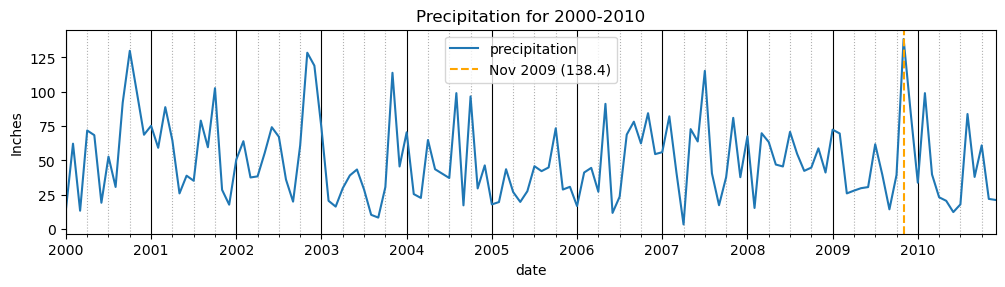

In [34]:
fig, ax = plt.subplots(figsize=(12,3))
Q1_prec['precipitation'].plot(ax = ax, title='Precipitation for 2000-2010', ylabel='Inches')
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=0,ha='center')
# Add a line for the max precipitation date and value
ax.axvline(max_date, color = 'orange', ls ="--", label=f'Nov 2009 ({Q1_prec["precipitation"].max()})')
ax.legend();

## Q2: Which year between 2000-2020 had the coolest average temperature?

In [35]:
#prepare a copy of data for Q2
Q2_temp = df.copy()

In [36]:
#create a filter to filter data between 2000 through 2020
filter_q2 = Q2_temp.index <= '2020-12-31'

In [37]:
#apply the filter
Q2_temp = Q2_temp [filter_q2]

In [38]:
#confirm that the filter is working
print(Q2_temp.head(3))
print(Q2_temp.tail(3))

            precipitation  mean_temp  min_temp  max_temp  snow_depth
date                                                                
2000-01-01            0.0        7.0       4.9      10.8         0.0
2000-01-02            0.2        7.9       5.0      11.5         0.0
2000-01-03            6.0        9.4       7.2       9.5         0.0
            precipitation  mean_temp  min_temp  max_temp  snow_depth
date                                                                
2020-12-29            0.0        2.6       1.1       4.1         0.0
2020-12-30            0.0        2.7      -0.1       5.6         0.0
2020-12-31            0.0       -0.8      -3.1       1.5         0.0


In [39]:
# Resample the data as Yearly frequency.
Q2_temp = Q2_temp.resample("A").mean()
Q2_temp.head(5)

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-12-31,1.974863,11.575683,8.001503,15.144672,0.008197
2001-12-31,1.850411,11.331507,7.647397,15.036575,0.000000
2002-12-31,2.060000,12.084247,8.425890,15.815205,0.000000
2003-12-31,1.261096,12.114521,7.895890,16.360274,0.024658
2004-12-31,1.622131,11.900683,8.234563,15.549044,0.005464


In [40]:
# Determine the date and value for the lowest mean temp.
min_date = Q2_temp['mean_temp'].idxmin()
min_date

Timestamp('2010-12-31 00:00:00', freq='A-DEC')

In [41]:
# Find the value for the lowest mean temp
min_mean_temp = Q2_temp['mean_temp'].min()
min_mean_temp

10.657397260273973

In [42]:
##Double-check
Q2_temp['mean_temp'].sort_values(ascending=True)

date
2010-12-31    10.657397
2013-12-31    11.166301
2012-12-31    11.300956
2008-12-31    11.326776
2001-12-31    11.331507
2000-12-31    11.575683
2009-12-31    11.721644
2005-12-31    11.822877
2004-12-31    11.900683
2016-12-31    11.906284
2007-12-31    11.944384
2002-12-31    12.084247
2003-12-31    12.114521
2015-12-31    12.123699
2019-12-31    12.206164
2017-12-31    12.242466
2006-12-31    12.290822
2011-12-31    12.366438
2018-12-31    12.501370
2014-12-31    12.658904
2020-12-31    12.723634
Name: mean_temp, dtype: float64

**Answer**: The year **2010** had the lowest average temperature of **10.66**.

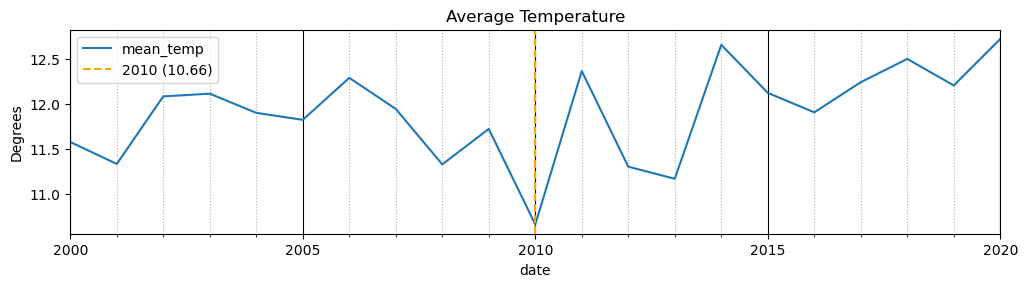

In [43]:
fig, ax = plt.subplots(figsize=(12,3))
Q2_temp['mean_temp'].plot(ax = ax, title='Average Temperature', ylabel='Degrees')
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=0,ha='center')

# Add a line for the max precipitation date and value
ax.axvline(min_date, color = 'orange', ls ="--", label=f'2010 ({Q2_temp["mean_temp"].min():.2f})')
ax.legend();